# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

### The goal of this project is to describe the characteristics of women susceptible to have a high level of fertility

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

* The project hypothesis is that there is a set of specific characteristics that best suited to describe women with a high level of fertility
* the research question is : " what are the characteristics that best describe women who are highly fertile ?"

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


* The dataset used for this project was download from the site of the demographic and health program. It was created to surve as a survry on mortality, morbidity and usage of services from 2016-2017. It was executed by The Haitian ministry for public health and population along side the haitian institut for childhood.
* the link for this dataset is : "https://dhsprogram.com/data/dataset/Haiti_Standard-DHS_2016.cfm?flag=1"

# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# read the csv file containning the dataset
d2=pd.read_csv("HTIR71FL.csv",encoding='latin-1')

C:\Users\leami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (53,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# print the first five observations
d2.head(5)

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,...,S234A$3,S234A$4,S234A$5,S234A$6,S235$1,S235$2,S235$3,S235$4,S235$5,S235$6
0,1 1 3,HT7,1,1,3,1,1140608,3,2017,1407,...,,,,,,,,,,
1,1 3 3,HT7,1,3,3,1,1140608,3,2017,1407,...,,,,,,,,,,
2,1 3 4,HT7,1,3,4,1,1140608,3,2017,1407,...,,,,,,,,,,
3,1 17 2,HT7,1,17,2,1,1140608,3,2017,1407,...,,,,,,,,,,
4,1 19 2,HT7,1,19,2,1,1140608,3,2017,1407,...,,,,,,,,,,


In [4]:
# print the last five observations
d2.tail(5)

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,...,S234A$3,S234A$4,S234A$5,S234A$6,S235$1,S235$2,S235$3,S235$4,S235$5,S235$6
15508,450 92 2,HT7,450,92,2,450,2350633,12,2016,1404,...,,,,,,,,,,
15509,450 92 4,HT7,450,92,4,450,2350633,12,2016,1404,...,,,,,,,,,,
15510,450 93 1,HT7,450,93,1,450,2350633,12,2016,1404,...,,,,,,,,,,
15511,450 93 3,HT7,450,93,3,450,2350633,12,2016,1404,...,,,,,,,,,,
15512,450 93 4,HT7,450,93,4,450,2350633,12,2016,1404,...,,,,,,,,,,


In [5]:
# select the useful columns
dataset=d2[["V012","V013","V024","V025","V106","V130","V155","V169A","V170","V171A","V190","V201","V212","V217","V218","V244","V312","V313","V310","V525","V745A","V745B","S238BA","S238BB","S238BC","V191"]]

In [6]:
# verify the selected columns
dataset.columns

Index(['V012', 'V013', 'V024', 'V025', 'V106', 'V130', 'V155', 'V169A', 'V170',
       'V171A', 'V190', 'V201', 'V212', 'V217', 'V218', 'V244', 'V312', 'V313',
       'V310', 'V525', 'V745A', 'V745B', 'S238BA', 'S238BB', 'S238BC', 'V191'],
      dtype='object')

In [7]:
# create a set with the variable name(meaning)
col={"V012":"age","V013":"Age groups","V020":"Ever-married","V024":"Region","V025":"Type of place of residence","V026":"placeofresidence","V106":"Highest educational level","V130":"Religion","V155":"Literacy","V169A":"mobile telephone","V170":"bank account","V171A":"Use of internet","V191":"Wealth index","V745A":"Owns a house","V745B":"Owns land","V602":"Fertility preference","V190":"Wealth index cat","V201":"parity","V212":"Age at 1st birth","V217":"ovulatory cycle","V218":"living children","V244":"pregnant after birth and before period","V312":"contraceptive method","V313":"contraceptive method type","V310":"nb child at contraceptive first use","V525":"Age at first sex","S238BA":"abortion","S238BB":"miscarriages","S238BC":"born dead"}

In [8]:
# replace the existing columns names with their meaning
dataset.rename(columns=col,inplace=True)

C:\Users\leami\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
# print the variable name, type and number of null cell
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   age                                     15513 non-null  int64 
 1   Age groups                              15513 non-null  object
 2   Region                                  15513 non-null  object
 3   Type of place of residence              15513 non-null  object
 4   Highest educational level               15513 non-null  object
 5   Religion                                15513 non-null  object
 6   Literacy                                15513 non-null  object
 7   mobile telephone                        15513 non-null  object
 8   bank account                            15513 non-null  object
 9   Use of internet                         15513 non-null  object
 10  Wealth index cat                        15513 non-null  object
 11  pa

In [10]:
# Print each variable with their modalities to look for blank cell
for x in dataset.columns:
    print(x,dataset[x].unique)

age <bound method Series.unique of 0        18
1        28
2        18
3        33
4        28
         ..
15508    58
15509    26
15510    34
15511    34
15512    24
Name: age, Length: 15513, dtype: int64>
Age groups <bound method Series.unique of 0        15-19
1        25-29
2        15-19
3        30-34
4        25-29
         ...  
15508      50+
15509    25-29
15510    30-34
15511    30-34
15512    20-24
Name: Age groups, Length: 15513, dtype: object>
Region <bound method Series.unique of 0                        Sud
1                        Sud
2                        Sud
3                        Sud
4                        Sud
                ...         
15508    Aire Metropolitaine
15509    Aire Metropolitaine
15510    Aire Metropolitaine
15511    Aire Metropolitaine
15512    Aire Metropolitaine
Name: Region, Length: 15513, dtype: object>
Type of place of residence <bound method Series.unique of 0        Rural
1        Rural
2        Rural
3        Rural
4        Rural
    

In [11]:
# remove blank cells from parity variable
dataset=dataset[dataset.parity!=" "]
# Convert the variable to int type
dataset.parity=dataset.parity.astype(int)

In [12]:
# Group Metropoloitain region and near by region under Ouest departement 
dataset.Region=dataset.Region.replace({'Aire Metropolitaine':'Ouest','Rest-Ouest':'Ouest'})

In [13]:
# remove blank cells from Age at fist birth variable
dataset=dataset[dataset["Age at 1st birth"]!=" "]
# Convert the variable to int type
dataset["Age at 1st birth"]=dataset["Age at 1st birth"].astype(int)

In [14]:
# Convert the variable to int type
dataset["living children"]=dataset["living children"].astype(int)

In [15]:
# Convert the variable to int type
dataset["Age at first sex"]=dataset["Age at first sex"].astype(int)

In [16]:
# remove blank cells from abortion variable
dataset=dataset[dataset["abortion"]!=" "]
# Convert the variable to int type
dataset["abortion"]=dataset["abortion"].astype(int)

In [17]:
# Convert the variable to int type
dataset.miscarriages=dataset.miscarriages.astype(int)

In [18]:
# Convert the variable to int type
dataset["born dead"]=dataset["born dead"].astype(int)

In [19]:
# correct the orthograph of Grande Anse
dataset.Region=dataset.Region.replace("Grand'Anse","Grande'Anse")

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

In [20]:
# create a function to create summary table from the dataset variables 
def create_table (table_name="name",column="col"):
    table_name=dataset[column].value_counts().to_frame()
    table_name["percent"]=dataset[column].value_counts(normalize=True).to_frame()
    return table_name

In [21]:
# create a function that create a histogram
def create_histo (data=dataset,x="age"):
    sns.set_theme(style="darkgrid")

    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)

    sns.histplot(
        dataset,
        x=x,
        multiple="stack",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
    )
    ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    #ax.set_xticks([10, 20, 30, 40, 50, 60, 70])
    plt.show() 

In [22]:
# create a function that create barchart
def create_barchart (x,y,per):
    graph=plt.bar(x,y)
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        
        plt.text(x+width/2,
                y+height*1.01,
                str(round(per[i],2))+'%',
                ha='center',
                weight='bold')
        i += 1
    plt.xticks(rotation=90)
    plt.show()

In [23]:
# create a function that create a piechart
def create_piechar(table="table",column="column"):
    table[column].plot(kind="pie",autopct='%1.1f%%')
    plt.show()

In [24]:
# create a function that create a scatterplot
def  create_scatterplot(x,y,hue=None):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    sns.regplot(x=x, y=y,
                    data=dataset, ax=ax)
    plt.show

In [25]:
# create a function that create a boxplot
def create_boxplot(x,y,hue=None):
        sns.boxplot(x=x, y=y,
                hue=None, palette=["m", "g"],
                data=dataset)
        sns.despine(offset=10, trim=True)
        plt.xticks(rotation=90)
        plt.show()

# Demographical characteristics

### Age

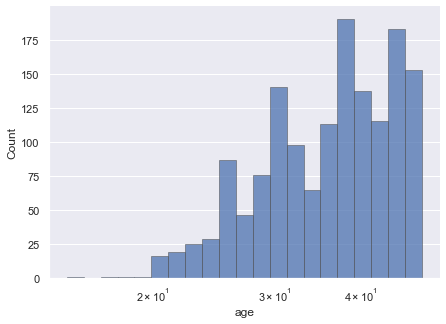

count    1496.000000
mean       36.530749
std         7.585701
min        15.000000
25%        31.000000
50%        37.000000
75%        43.000000
max        49.000000
Name: age, dtype: float64


In [26]:
# create a histogram of the variable age
create_histo()
# print the summary statistics of the "age"
print(dataset.age.describe())

The mean age of our population is 36.5 (15-49) years. So our population is young with no woman older than 49 year.

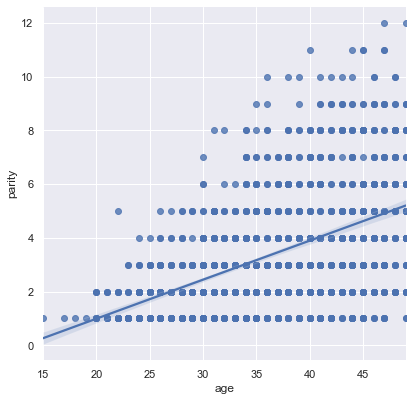

In [27]:
# create a scatterplot of the age and the parity
create_scatterplot("age","parity")

There is a certain correlation between the woman age and the number of child she had. The chart trend shows that the number of child cared by a woman than to increase as she aged.

## Age group

In [28]:
# create a summary table of the age group repartition
Age_group=create_table(table_name="Age_group",column="Age groups")

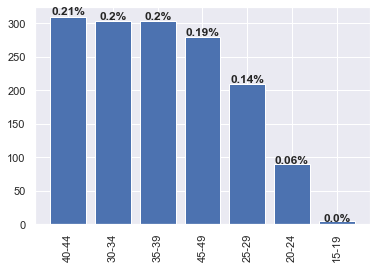

       Age groups   percent
40-44         309  0.206551
30-34         303  0.202540
35-39         303  0.202540
45-49         279  0.186497
25-29         209  0.139706
20-24          89  0.059492
15-19           4  0.002674


In [29]:
# create a barchart of the age group 
create_barchart(x=Age_group.index,y=Age_group["Age groups"],per=Age_group.percent)
print(Age_group)

* Women aged 40-44 years were the most represented group(309, 20.6%)

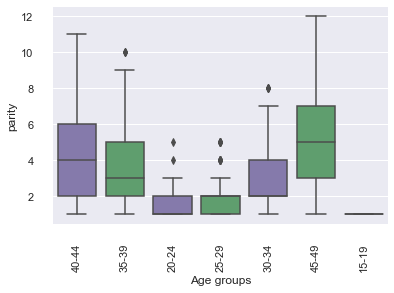

In [30]:
# create a boxplot of the age group and parity
create_boxplot("Age groups","parity")

In [31]:
# create a parity variable for each age group
a=dataset[["parity"]][dataset["Age groups"]=="15-19"]
b=dataset[["parity"]][dataset["Age groups"]=="20-24"]
c=dataset[["parity"]][dataset["Age groups"]=="25-29"]
d=dataset[["parity"]][dataset["Age groups"]=="30-34"]
e=dataset[["parity"]][dataset["Age groups"]=="35-39"]
f=dataset[["parity"]][dataset["Age groups"]=="40-44"]
g=dataset[["parity"]][dataset["Age groups"]=="45-49"]

In [32]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d,e,f,g)

F_onewayResult(statistic=array([75.88405402]), pvalue=array([8.36482838e-83]))

* There is a difference in the number of child beared by the women of the different age group.This difference is statistically significant (p-value=8.36482838e-83<0.05)
* The woman age 45-49 year were had the highest number of child beared.

## Region/Departement

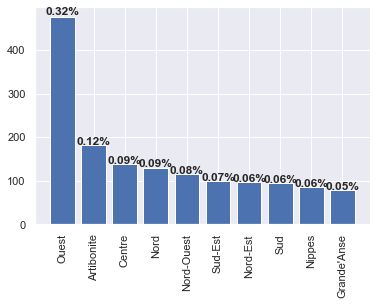

             Region   percent
Ouest           475  0.317513
Artibonite      182  0.121658
Centre          138  0.092246
Nord            130  0.086898
Nord-Ouest      116  0.077540
Sud-Est         100  0.066845
Nord-Est         96  0.064171
Sud              94  0.062834
Nippes           86  0.057487
Grande'Anse      79  0.052807


In [33]:
# create a summary table for the region variable 
region=create_table("region","Region")
# create a barchart of the region variable
create_barchart(region.index,region.Region,region.percent)
print(region)

* The women from the west departement represented more than one third of our population (475, 31.7%)

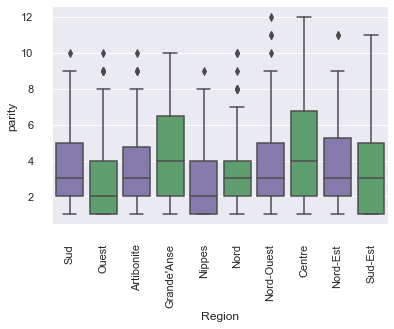

In [34]:
# create a boxplot of the region and parity
create_boxplot(x="Region",y="parity")

In [35]:
# create a parity variable for each region
a=dataset[["parity"]][dataset["Region"]=="Ouest"]
b=dataset[["parity"]][dataset["Region"]=="Artibonite"]
c=dataset[["parity"]][dataset["Region"]=="Centre"]
d=dataset[["parity"]][dataset["Region"]=="Nord"]
e=dataset[["parity"]][dataset["Region"]=="Nord-Ouest"]
f=dataset[["parity"]][dataset["Region"]=="Sud-Est"]
g=dataset[["parity"]][dataset["Region"]=="Nord-Est"]
h=dataset[["parity"]][dataset["Region"]=="Sud"]
i=dataset[["parity"]][dataset["Region"]=="Nippes"]
j=dataset[["parity"]][dataset["Region"]=="Grande'Anse"]

In [36]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d,e,f,g,h,i,j)

F_onewayResult(statistic=array([10.30691195]), pvalue=array([1.48933677e-15]))

* There is a difference in the number of child beared by the women of the different age departement.This difference is statistically significant (p-value=1.48933677e-15<0.05)
* The woman from Grande'Anse had the highest number of child beared.

In [37]:
frame=dataset[["parity","Age at 1st birth","Age at first sex","Region"]].groupby("Region").mean()

In [38]:
print(frame)

               parity  Age at 1st birth  Age at first sex
Region                                                   
Artibonite   3.324176         21.835165         17.120879
Centre       4.384058         20.992754         17.369565
Grande'Anse  4.493671         21.202532         16.721519
Nippes       3.093023         20.837209         17.093023
Nord         3.176923         21.838462         16.884615
Nord-Est     3.864583         20.812500         17.343750
Nord-Ouest   3.827586         21.163793         16.879310
Ouest        2.829474         21.804211         17.349474
Sud          3.638298         22.095745         17.755319
Sud-Est      3.310000         21.530000         17.230000


#### Region/Age at 1st sex

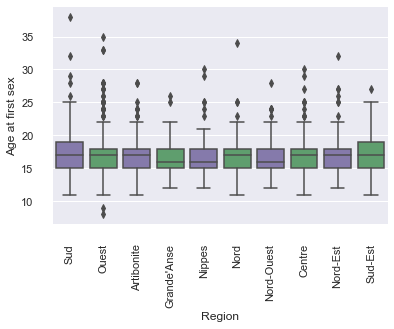

In [39]:
create_boxplot(x="Region",y="Age at first sex")

In [40]:
# create a variable for each region
a=dataset[["Age at first sex"]][dataset["Region"]=="Ouest"]
b=dataset[["Age at first sex"]][dataset["Region"]=="Artibonite"]
c=dataset[["Age at first sex"]][dataset["Region"]=="Centre"]
d=dataset[["Age at first sex"]][dataset["Region"]=="Nord"]
e=dataset[["Age at first sex"]][dataset["Region"]=="Nord-Ouest"]
f=dataset[["Age at first sex"]][dataset["Region"]=="Sud-Est"]
g=dataset[["Age at first sex"]][dataset["Region"]=="Nord-Est"]
h=dataset[["Age at first sex"]][dataset["Region"]=="Sud"]
i=dataset[["Age at first sex"]][dataset["Region"]=="Nippes"]
j=dataset[["Age at first sex"]][dataset["Region"]=="Grande'Anse"]

In [41]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d,e,f,g,h,i,j)

F_onewayResult(statistic=array([0.99374909]), pvalue=array([0.443025]))

#### Region/ Age at 1st birth

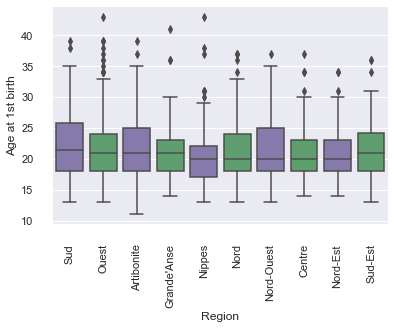

In [42]:
create_boxplot(x="Region",y="Age at 1st birth")

In [43]:
# create a variable for each region
a=dataset[["Age at 1st birth"]][dataset["Region"]=="Ouest"]
b=dataset[["Age at 1st birth"]][dataset["Region"]=="Artibonite"]
c=dataset[["Age at 1st birth"]][dataset["Region"]=="Centre"]
d=dataset[["Age at 1st birth"]][dataset["Region"]=="Nord"]
e=dataset[["Age at 1st birth"]][dataset["Region"]=="Nord-Ouest"]
f=dataset[["Age at 1st birth"]][dataset["Region"]=="Sud-Est"]
g=dataset[["Age at 1st birth"]][dataset["Region"]=="Nord-Est"]
h=dataset[["Age at 1st birth"]][dataset["Region"]=="Sud"]
i=dataset[["Age at 1st birth"]][dataset["Region"]=="Nippes"]
j=dataset[["Age at 1st birth"]][dataset["Region"]=="Grande'Anse"]

In [44]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d,e,f,g,h,i,j)

F_onewayResult(statistic=array([1.16966702]), pvalue=array([0.31045411]))

* Considering the fact that the women from Grande'Anse had the highest mean number of beared child(4.493671 children) we would think that they started procreating hearlier those of the others departement. However the analysis infirmed this hypothesis and the difference between the age at first birth by departement is not statistically significant.

## Residence (Urban/Rural)

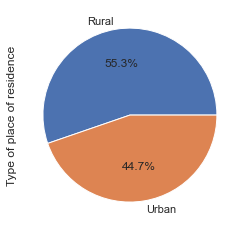

       Type of place of residence   percent
Rural                         827  0.552807
Urban                         669  0.447193


In [45]:
# create a summary table for type of place of residence 
residence=create_table("residence","Type of place of residence")
# create a piechart of the type of place of residence
create_piechar(residence,"Type of place of residence")
print(residence)

* The woman from rural area were the most represented with 827 women (55.28%)

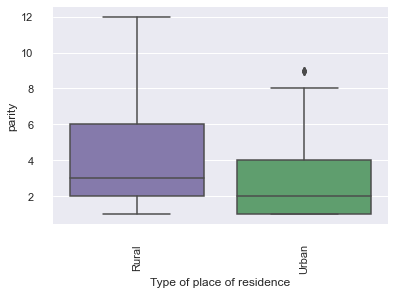

In [46]:
# create a boxplot of the type of residence
create_boxplot("Type of place of residence","parity")

In [47]:
dataset[["Age at 1st birth","Type of place of residence"]].groupby("Type of place of residence").mean()

,Age at 1st birth
Type of place of residence,
Rural,21.102781
Urban,22.070254


In [48]:
# create a parity variable for each Type of place of residence
a=dataset[["parity"]][dataset["Type of place of residence"]=="Rural"]
b=dataset[["parity"]][dataset["Type of place of residence"]=="Urban"]

In [49]:
# execute a T test on the parity for each Type of place of residence
stats.ttest_ind(a,b)

Ttest_indResult(statistic=array([10.41124511]), pvalue=array([1.48894121e-24]))

* The woman living in rural area had a highier number of child than those living in urban area. This difference between the two groups is statistically significant (p-value=1.48894121e-24<0.05)

## Religion

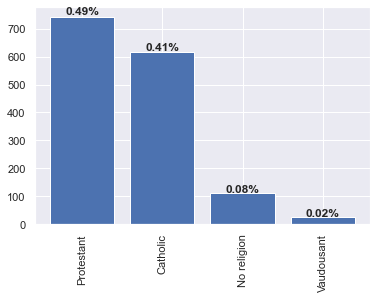

             Religion   percent
Protestant        740  0.494652
Catholic          615  0.411096
No religion       113  0.075535
Vaudousant         28  0.018717


In [50]:
# create a table summary of the religion 
religion=create_table("religion","Religion")
#create a barchart of the religion
create_barchart(religion.index,religion.Religion,per=religion.percent)
print(religion)

* The most represented religion were the protestant one with 740 women.(49.46%)

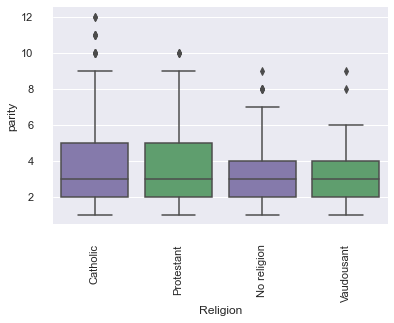

In [51]:
# create a boxplot of the religion and parity
create_boxplot("Religion","parity")

In [52]:
# create a parity variable for each religion
a=dataset[["parity"]][dataset["Religion"]=="Catholic"]
b=dataset[["parity"]][dataset["Religion"]=="Protestant"]
c=dataset[["parity"]][dataset["Religion"]=="Vaudousant"]
d=dataset[["parity"]][dataset["Religion"]=="No religion"]

In [53]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=array([0.08369564]), pvalue=array([0.96893781]))

* the difference of mean number of child of a woman by religions are not statistically significant (p-value=0.96893781<0.05)

# Socioeconomic characteristics

## Literacy

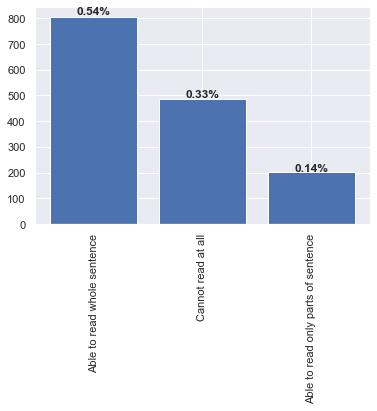

                                     Literacy   percent
Able to read whole sentence               805  0.538102
Cannot read at all                        487  0.325535
Able to read only parts of sentence       204  0.136364


In [54]:
# create a summary table for the literacy variable
Literacy=create_table("Literacy","Literacy")
# create a barchart of the literacy variable
create_barchart(Literacy.index,Literacy.Literacy,per=Literacy.percent)
print(Literacy)

* The women able to read whole sentence were the most represented group with 805 women (53.8%)

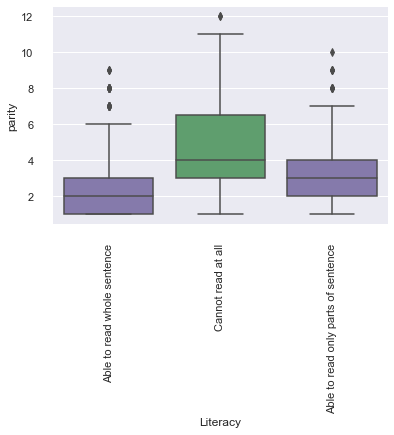

In [55]:
# create a boxplot of the literacy and parity
create_boxplot("Literacy","parity")

In [56]:
dataset[["parity","Literacy"]].groupby("Literacy").mean()

,parity
Literacy,
Able to read only parts of sentence,3.367647
Able to read whole sentence,2.616149
Cannot read at all,4.687885


In [57]:
# create a parity variable for each literacy group
a=dataset[["parity"]][dataset["Literacy"]=="Able to read whole sentence"]
b=dataset[["parity"]][dataset["Literacy"]=="Cannot read at all"]
c=dataset[["parity"]][dataset["Literacy"]=="Able to read only parts of sentence"]

In [58]:
# Execute a ANOVA test 
stats.f_oneway(a,b,c)

F_onewayResult(statistic=array([154.47533426]), pvalue=array([1.05578058e-61]))

* The women who could not read at all were the ones with the highest mean number of beared child. The difference from the other groups were statistically significant (p-value=1.05578058e-61<0.05)

## Telephone

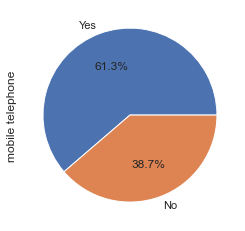

     mobile telephone   percent
Yes               917  0.612968
No                579  0.387032


In [59]:
# create a summary table of the telephone variable
telephone=create_table("telephone","mobile telephone")
# create a piechart of the telephone variable
create_piechar(telephone,column="mobile telephone")
print(telephone)

* The women that had a telephone were the most represented with 917 women (61.3%)

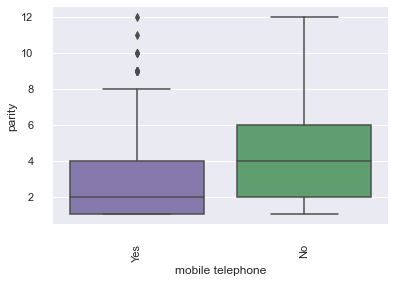

In [60]:
# create a boxplot of the mobile telephone and the parity
create_boxplot("mobile telephone","parity")

In [61]:
dataset[["parity","mobile telephone"]].groupby("mobile telephone").mean()

,parity
mobile telephone,
No,4.371330
Yes,2.775354


In [62]:
# create a parity variable for each modality of the mobile telephone variable
a=dataset[["parity"]][dataset["mobile telephone"]=="Yes"]
b=dataset[["parity"]][dataset["mobile telephone"]=="No"]

In [63]:
# Execute a T test
stats.ttest_ind(a,b)

Ttest_indResult(statistic=array([-14.20538186]), pvalue=array([4.71207862e-43]))

* The women that didn't have a telephone were the ones with the hightiest mean number of child. The difference from those who had one was statistically significant (p-value=4.71207862e-43<0.05)

## Bank Account

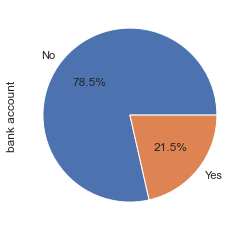

     bank account   percent
No           1175  0.785428
Yes           321  0.214572


In [64]:
# Create a summary table of the bank account
bank=create_table("bank","bank account")
# create a piechart of the bank account
create_piechar(bank,column="bank account")
print(bank)

* The women that didn't have a bank account were the most represented with 1175 women (78.5%)

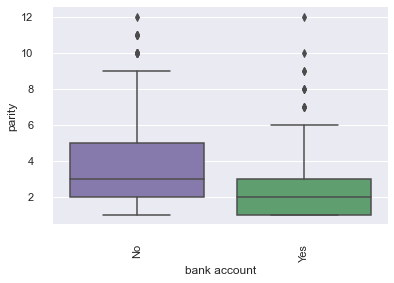

In [65]:
# create a boxplot of the bank account and the parity
create_boxplot("bank account","parity")

In [66]:
# create a parity variable for each modality of the bank account variable
a=dataset[["parity"]][dataset["bank account"]=="Yes"]
b=dataset[["parity"]][dataset["bank account"]=="No"]

In [67]:
# Execute a T test 
stats.ttest_ind(a,b)

Ttest_indResult(statistic=array([-8.40789162]), pvalue=array([9.6092669e-17]))

* The women that didn't have a bank account were the ones with the hightiest mean number of child. The difference from those who had one was statistically significant(p-value=4.71207862e-43<0.05)

## Internet

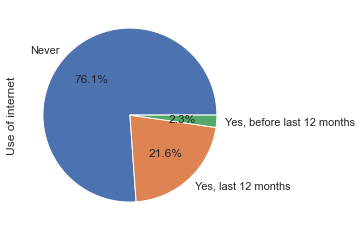

                            Use of internet   percent
Never                                  1139  0.761364
Yes, last 12 months                     323  0.215909
Yes, before last 12 months               34  0.022727


In [68]:
# create a summary table of the "use of internet"  variable
internet=create_table("internet","Use of internet")
# create a piechart of the "use of internet" variable
create_piechar(internet,column="Use of internet")
print(internet)

* The women that had never use internet were the most represented with 1139 women (76.1%)

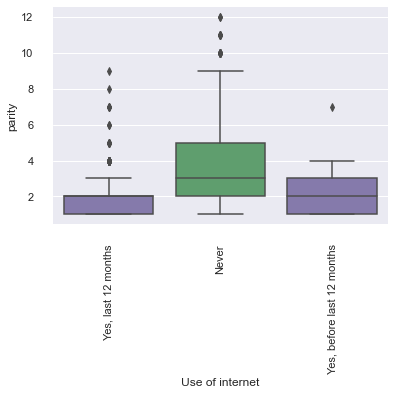

In [69]:
# create a boxplot of the "use of internet" and "parity"
create_boxplot("Use of internet","parity")

In [70]:
# create a parity variable for each modality of the use of internet
a=dataset[["parity"]][dataset["Use of internet"]=="Yes, last 12 months"]
b=dataset[["parity"]][dataset["Use of internet"]=="Never"]
c=dataset[["parity"]][dataset["Use of internet"]=="Yes, before last 12 months"]

In [71]:
# Execute a ANOVA test
stats.f_oneway(a,b,c)

F_onewayResult(statistic=array([97.15992693]), pvalue=array([2.15166632e-40]))

* The women that had never use internet were the ones with the hightiest mean number of child. The difference from the other groups was statistically significant(p-value=2.15166632e-40<0.05)

## Wealth Category

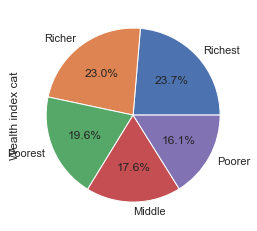

         Wealth index cat   percent
Richest               354  0.236631
Richer                344  0.229947
Poorest               293  0.195856
Middle                264  0.176471
Poorer                241  0.161096


In [72]:
# create a summary table of wealth cat
wealth_cat=create_table("wealth_cat","Wealth index cat")
# create a piechart of wealth cat
create_piechar(wealth_cat,column="Wealth index cat")
print(wealth_cat)

* The women who were the richest were the most represented with 354 women (23.6%)

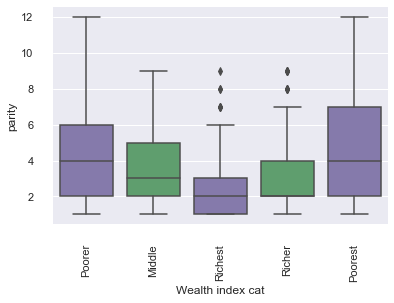

In [73]:
# create a boxplot of the "wealth cat" and "parity"
create_boxplot("Wealth index cat","parity")

In [74]:
dataset[["Wealth index cat","parity"]].groupby("Wealth index cat").mean()

,parity
Wealth index cat,
Middle,3.340909
Poorer,4.253112
Poorest,4.723549
Richer,2.843023
Richest,2.279661


In [75]:
# create a parity variable for each modality of the wealth index cat
a=dataset[["parity"]][dataset["Wealth index cat"]=="Poorer"]
b=dataset[["parity"]][dataset["Wealth index cat"]=="Middle"]
c=dataset[["parity"]][dataset["Wealth index cat"]=="Richest"]
d=dataset[["parity"]][dataset["Wealth index cat"]=="Richer"]
e=dataset[["parity"]][dataset["Wealth index cat"]=="Poorest"]

In [76]:
# Execute a ANOVA test  
stats.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=array([72.74970742]), pvalue=array([2.31787502e-56]))

* The women that were the poorest were the ones with the hightiest mean number of child. The difference from the other groups was statistically significant(p-value=2.31787502e-56<0.05)

## Wealth index

C:\Users\leami\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


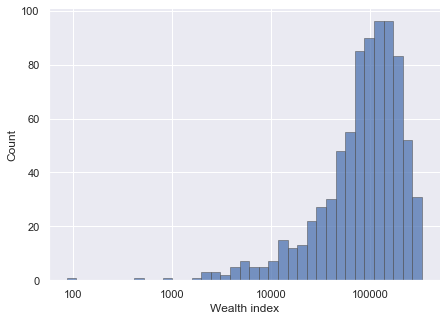

count      1496.000000
mean      28205.794786
std      106513.029602
min     -123718.000000
25%      -67325.000000
50%       12874.500000
75%      106427.250000
max      336616.000000
Name: Wealth index, dtype: float64

In [77]:
# create a histogram of wealth index
create_histo(dataset,x="Wealth index")
# print the summary statistics of the "Wealth index"
dataset["Wealth index"].describe()

* About 25% of woman have a combined wealth index that is less than -67325

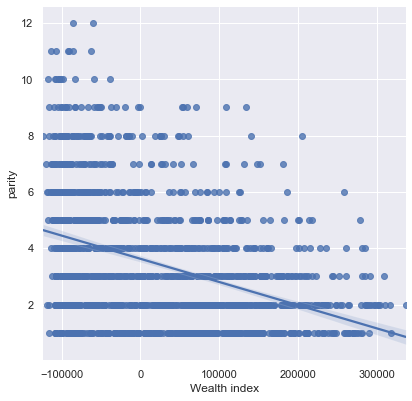

In [78]:
create_scatterplot("Wealth index","parity")

* A woman combined wealth index is inversely correlated to the total number of child beared 

In [79]:
dataset[["Wealth index","Region"]].groupby("Region").mean().sort_values(by="Wealth index",ascending=False)

,Wealth index
Region,
Ouest,88051.694737
Artibonite,23256.681319
Nord,18766.615385
Sud,16137.521277
Nord-Ouest,1985.025862
Nord-Est,509.229167
Sud-Est,137.210000
Nippes,-14025.337209
Centre,-19615.202899


* The west departement is the one with the highest wealth combined index and the lowest is Grande'Anse(let us remenber that it is also the one with the high mean total number of child beared )

## Education level

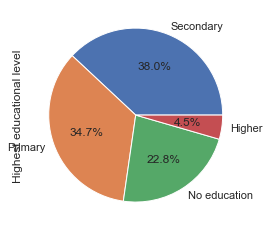

              Highest educational level   percent
Secondary                           569  0.380348
Primary                             519  0.346925
No education                        341  0.227941
Higher                               67  0.044786


In [80]:
# create a summary table of education level
educ=create_table(table_name="educ",column="Highest educational level")
# create a piechart of education level
create_piechar(table=educ,column="Highest educational level")
print(educ)

* The women who's highiest education level were secondary were the most represented with 569 women (38%)

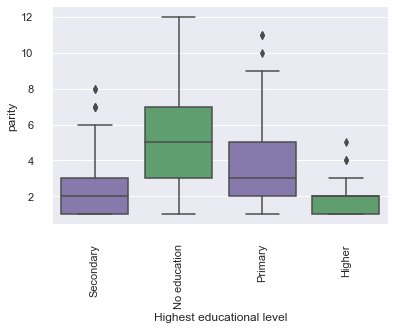

In [81]:
# create a boxplot of "education level" and "parity"
create_boxplot("Highest educational level","parity")

In [82]:
# create a parity variable for each modality of the educational level
a=dataset[["parity"]][dataset["Highest educational level"]=="Secondary"]
b=dataset[["parity"]][dataset["Highest educational level"]=="Primary"]
c=dataset[["parity"]][dataset["Highest educational level"]=="Higher"]
d=dataset[["parity"]][dataset["Highest educational level"]=="No education"]

In [83]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=array([180.63730933]), pvalue=array([6.58267316e-100]))

* The women with no education at all were the one with the highest mean number of child beared. The difference was statistically significant compared to the other groups of women (p-value=6.58267316e-100<0.05)

## Owns a Land

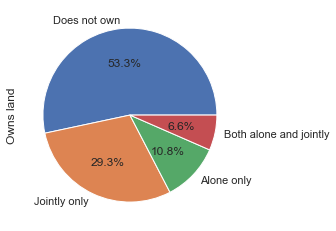

                        Owns land   percent
Does not own                  798  0.533422
Jointly only                  438  0.292781
Alone only                    162  0.108289
Both alone and jointly         98  0.065508


In [84]:
# create a summary table of the "owns land"
land=create_table("land","Owns land")
# create a piechart of the "owns land" variable
create_piechar(land,"Owns land")
print(land)

* The women who doesn't own a land were the most represented group with a count of 798 (53.3%)

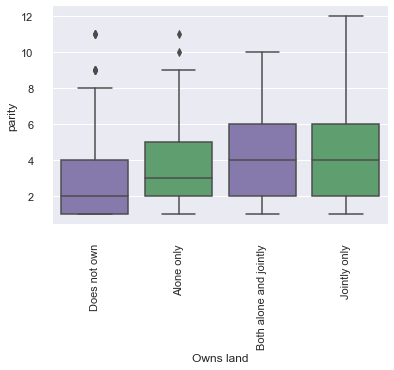

In [85]:
# create a boxplot of the "owns land" and "parity"
create_boxplot("Owns land","parity")

In [86]:
#Print a table with the mean parity for each group
dataset[["Owns land","parity"]].groupby("Owns land").mean()

,parity
Owns land,
Alone only,3.635802
Both alone and jointly,4.112245
Does not own,2.828321
Jointly only,4.171233


In [87]:
# create a parity variable for each modality of the "owns land" variable
a=dataset[["parity"]][dataset["Owns land"]=="Does not own"]
b=dataset[["parity"]][dataset["Owns land"]=="Alone only"]
c=dataset[["parity"]][dataset["Owns land"]=="Both alone and jointly"]
d=dataset[["parity"]][dataset["Owns land"]=="Jointly only"]

In [88]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=array([41.1063385]), pvalue=array([1.60232244e-25]))

* The women who only owns a land jointly were the ones with the highest mean number of child beared. The difference of parity between the different group is statistically significant(p-value=1.60232244e-25<0.05)

## Owns a house 

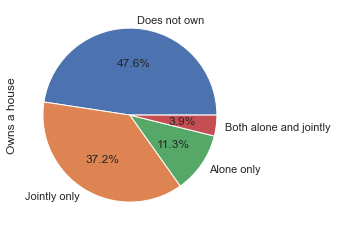

                        Owns a house   percent
Does not own                     712  0.475936
Jointly only                     557  0.372326
Alone only                       169  0.112968
Both alone and jointly            58  0.038770


In [89]:
# create a summary table of the "owns a house" variable
house=create_table("house","Owns a house")
# create a piechart of the "owns a house" variable
create_piechar(house,column="Owns a house")
print(house)

* The women who doesn't own a house were the most represented group with a count of 712 (47.6%)

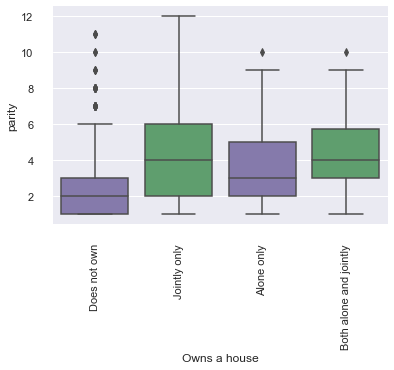

In [90]:
# create a boxplot of the "owns a house" and "parity"
create_boxplot("Owns a house","parity")

In [91]:
#Print a table with the mean parity for each group
dataset[["Owns a house","parity"]].groupby("Owns a house").mean()

,parity
Owns a house,
Alone only,3.934911
Both alone and jointly,4.206897
Does not own,2.612360
Jointly only,4.141831


In [92]:
# create a parity variable for each modality of the "own a house" variable
a=dataset[["parity"]][dataset["Owns a house"]=="Does not own"]
b=dataset[["parity"]][dataset["Owns a house"]=="Alone only"]
c=dataset[["parity"]][dataset["Owns a house"]=="Both alone and jointly"]
d=dataset[["parity"]][dataset["Owns a house"]=="Jointly only"]

In [93]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=array([61.35431739]), pvalue=array([2.10221274e-37]))

* The women who owns a house both alone and jointly were the ones with the highest mean number of child beared. The difference of parity between the different group is statistically significant(p-value=1.60232244e-25<0.05)

# Reproductive characteristics

## Parity

count    1496.000000
mean        3.393048
std         2.254225
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        12.000000
Name: parity, dtype: float64

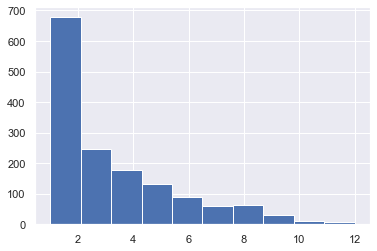

In [94]:
# create a histogram of the "parity" variable
plt.hist(dataset.parity)
plt.show
# print the summary statistics of the "parity"
dataset["parity"].describe()

* The mean number of child of our sample was 3.39 (1-12) children. 50 % of the women had at least 3 children.

## Age at first birth

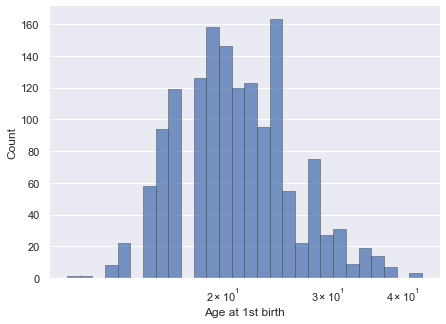

count    1496.000000
mean       21.535428
std         4.872153
min        11.000000
25%        18.000000
50%        21.000000
75%        24.000000
max        43.000000
Name: Age at 1st birth, dtype: float64

In [95]:
# create a histogram of the "age at first birth" variable
create_histo(dataset,x="Age at 1st birth")
# print the summary statistics of the "Age at first birth"
dataset["Age at 1st birth"].describe()

* The mean age at 1st birth ou population is 21.53 (11-43) year. Half of our sample had a child by the age of 21.

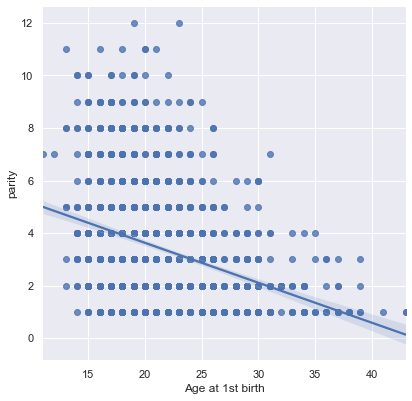

In [96]:
# create a scatterplot of the "Age at 1st birth" and "parity"
create_scatterplot("Age at 1st birth","parity")

* The number of child beared by a woman and the age at 1st birth are inversely correlated.

## Knowledge of the ovulatory cycle

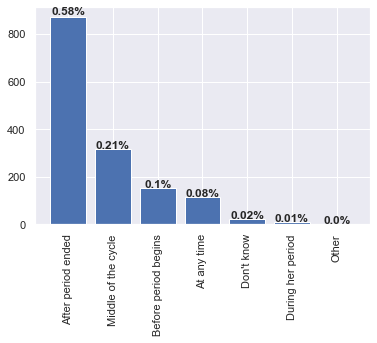

In [97]:
# create a summary table of the "ovulatory cycle" variable
cycle=create_table("cycle",'ovulatory cycle')
# create a barchart of the "ovulatory cycle" 
create_barchart(x=cycle.index,y=cycle['ovulatory cycle'],per=cycle.percent)

* The woman who had knowledge of their ovulatory cycle only after the ending of their period were the most represented with more than a half of the women.

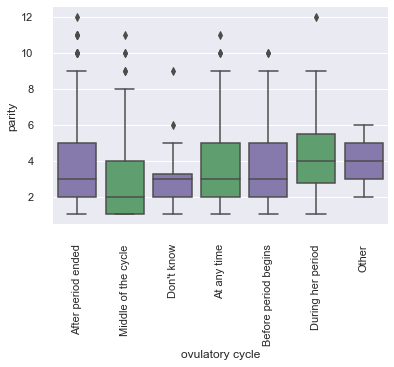

In [98]:
# create a boxplot for the "ovulatory cycle" and "parity"
create_boxplot("ovulatory cycle","parity")

In [99]:
# create a parity variable for each modality of the "ovulatory cycle" variable
a=dataset[["parity"]][dataset["ovulatory cycle"]=="After period ended"]
b=dataset[["parity"]][dataset["ovulatory cycle"]=="Middle of the cycle"]
c=dataset[["parity"]][dataset["ovulatory cycle"]=="Don't know"]
d=dataset[["parity"]][dataset["ovulatory cycle"]=="At any time"]
e=dataset[["parity"]][dataset["ovulatory cycle"]=="Before period begins"]
f=dataset[["parity"]][dataset["ovulatory cycle"]=="During her period"]
g=dataset[["parity"]][dataset["ovulatory cycle"]=="Other"]

In [100]:
# Execute a Anova test
stats.f_oneway(a,b,c,d,e,f,g)

F_onewayResult(statistic=array([3.19589139]), pvalue=array([0.00403312]))

## Nbr of living children

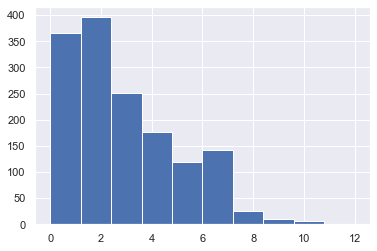

count    1496.000000
mean        3.000668
std         1.949016
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: living children, dtype: float64

In [101]:
# create histogram of the "living children" variable 
plt.hist(dataset["living children"])
plt.show()
# print the summary statistics of the "living children"
dataset["living children"].describe()

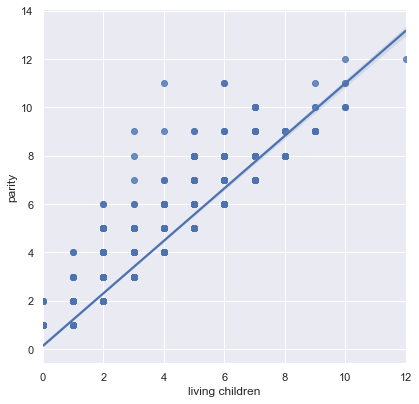

In [102]:
# Create a scatterplot of the "living children" and "parity"
create_scatterplot("living children","parity")

## Pregnant after birth and before period

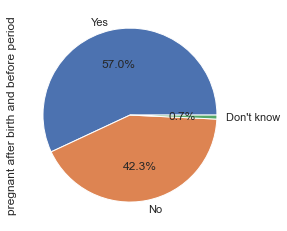

            pregnant after birth and before period   percent
Yes                                            852  0.569519
No                                             633  0.423128
Don't know                                      11  0.007353


In [103]:
# create a summary table of the "pregnant after birth and before period" variable
pabbp=create_table("pabbp","pregnant after birth and before period")
# create a piechart of the "pregnant after birth and before period" variable
create_piechar(pabbp,"pregnant after birth and before period")
print(pabbp)

* More than a half of the women knew that they could get pregnant after giving birth and before their periods


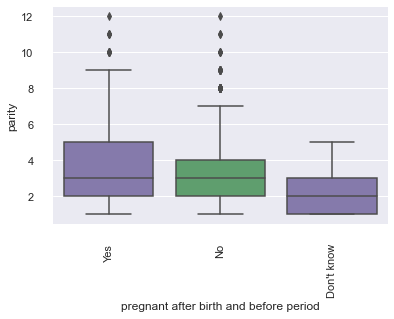

In [104]:
# create a boxplot of tge "pregnant after birth and before period" variable
create_boxplot("pregnant after birth and before period","parity")

In [105]:
# create a parity variable for each modality of the "pregnant after birth and before period" variable
a=dataset[["parity"]][dataset["pregnant after birth and before period"]=="Yes"]
b=dataset[["parity"]][dataset["pregnant after birth and before period"]=="No"]
c=dataset[["parity"]][dataset["pregnant after birth and before period"]=="Don't know"]


In [106]:
# execute a ANOVA test 
stats.f_oneway(a,b,c)

F_onewayResult(statistic=array([2.2541957]), pvalue=array([0.10531504]))

* their is no significant statistical deference between the groups for this variable (p-value=0.10531504<0.05)

## Contraception method

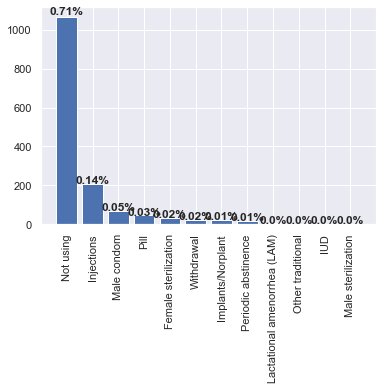

                              contraceptive method   percent
Not using                                     1063  0.710561
Injections                                     208  0.139037
Male condom                                     71  0.047460
Pill                                            46  0.030749
Female sterilization                            33  0.022059
Withdrawal                                      24  0.016043
Implants/Norplant                               22  0.014706
Periodic abstinence                             17  0.011364
Lactational amenorrhea (LAM)                     5  0.003342
Other traditional                                4  0.002674
IUD                                              2  0.001337
Male sterilization                               1  0.000668


In [107]:
# create a summary table of the "contraceptive method" variable
contra=create_table("contra","contraceptive method")
# create a barchart of the "contraceptive method" variable
create_barchart(contra.index,contra["contraceptive method"],per=contra.percent)
print(contra)

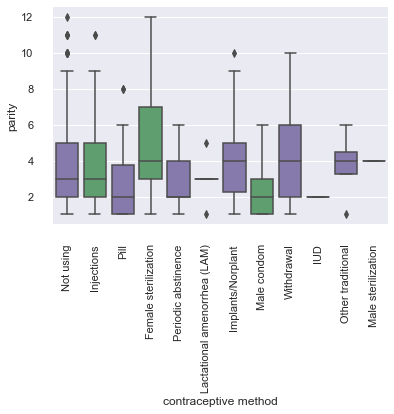

In [108]:
# create a boxplot of the "contraceptive method" and "parity" variable 
create_boxplot("contraceptive method","parity")

## Type of contraception method

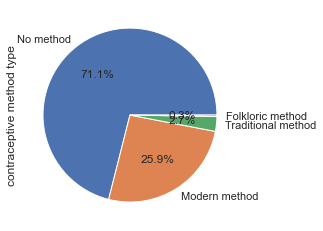

                    contraceptive method type   percent
No method                                1063  0.710561
Modern method                             388  0.259358
Traditional method                         41  0.027406
Folkloric method                            4  0.002674


In [109]:
# create a summary table of the "contraceptive method type" variable
method_type=create_table("method_type","contraceptive method type")
# create a piechart of the "contraceptive method type"variable
create_piechar(method_type,"contraceptive method type")
print(method_type)

* The majority of the women didn't use any kind of contraception method (71%)

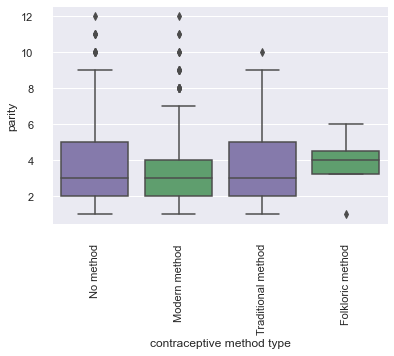

In [110]:
# create a boxplot of the "contraceptive method type" and "parity"
create_boxplot("contraceptive method type","parity")

In [111]:
# create a parity variable for each modality of the "contraceptive method type" variable
a=dataset[["parity"]][dataset["contraceptive method type"]=="No method"]
b=dataset[["parity"]][dataset["contraceptive method type"]=="Modern method"]
c=dataset[["parity"]][dataset["contraceptive method type"]=="Traditional method"]
d=dataset[["parity"]][dataset["contraceptive method type"]=="Folkloric method"]

In [112]:
# Execute a ANOVA test
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=array([0.2113651]), pvalue=array([0.8885666]))

* The difference of parity between the contraceptive method group isn't significant (p-value=0.8885666<0.05)

## Age at first sex

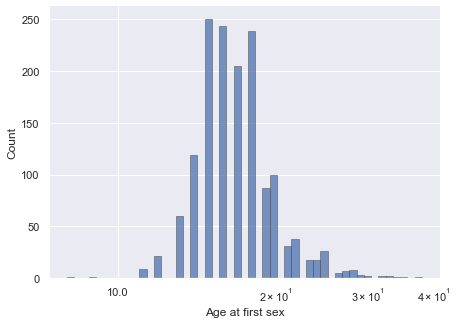

count    1496.000000
mean       17.215909
std         3.178025
min         8.000000
25%        15.000000
50%        17.000000
75%        18.000000
max        38.000000
Name: Age at first sex, dtype: float64

In [113]:
# create a histogram of the "age at first sex"
create_histo(dataset,x="Age at first sex")
# print the summary statistics of the "Age at first sex"
dataset["Age at first sex"].describe()

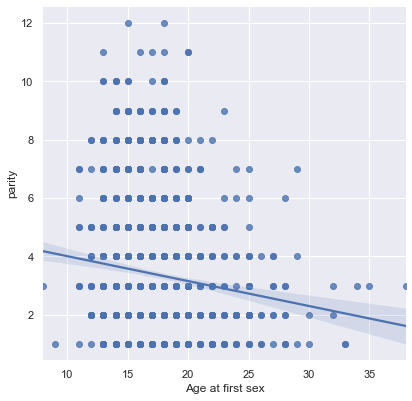

In [114]:
# create a scatterplot of the "Age at first sex" and "parity"
create_scatterplot("Age at first sex","parity")

* The age at first sex is negatively correlated to the parity

## Abortion

count    1496.000000
mean        0.361631
std         0.741217
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: abortion, dtype: float64

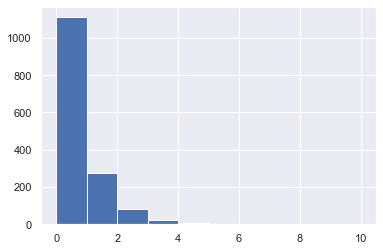

In [115]:
# create a histogram of the "abortion" 
plt.hist(dataset.abortion)
# print the summary statistics of the "abortion"
dataset.abortion.describe()

* the mean number of abortion was 0.36 (0-10) abortions.

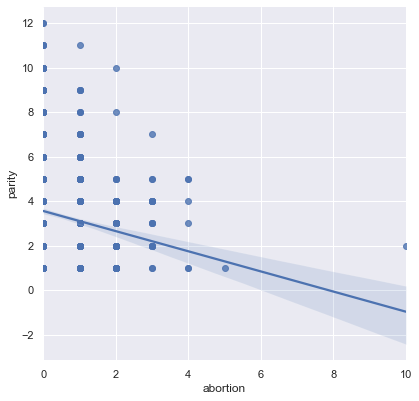

In [116]:
# create a scatterplot of the "abortion" and "parity"
create_scatterplot("abortion","parity")

* The number of abortion is negatively correlated to the parity

## Nbr of miscarriages

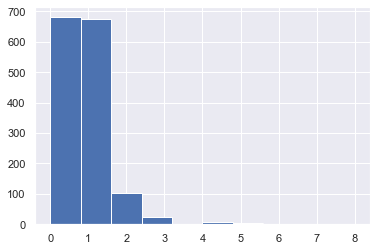

count    1496.000000
mean        0.682487
std         0.807234
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: miscarriages, dtype: float64

In [117]:
# create a histogram of the "miscarriages"
plt.hist(dataset["miscarriages"])
plt.show()
# print the summary statistics of the miscarriages
dataset["miscarriages"].describe()

* the mean number of miscarriage is 0.68 (0-8) miscarriages.

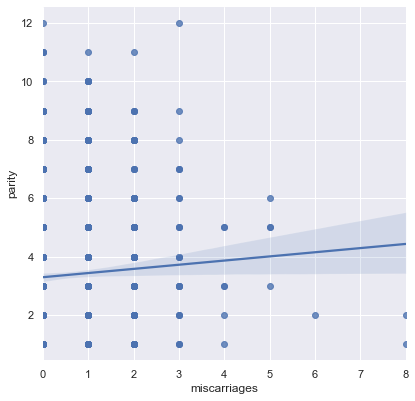

In [118]:
# create a scatterplot of the "misscarriages" and the "parity"
create_scatterplot('miscarriages','parity')

* The number of miscarriages is positively correlated to the number of child beared.

## Nbr of born dead

count    1496.000000
mean        0.300134
std         0.592167
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: born dead, dtype: float64

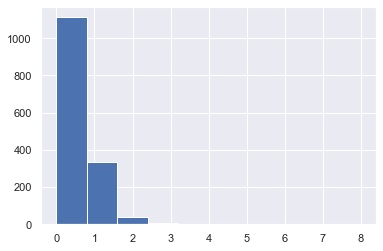

In [119]:
plt.hist(dataset["born dead"])
# print the summary statistics of the "born dead"
dataset["born dead"].describe()

* the mean number of born dead is 0.3 (0-8) born dead.

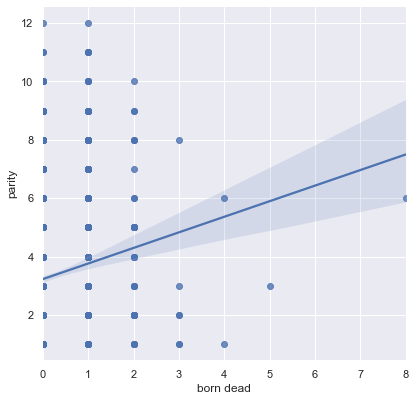

In [120]:
# create a scatterplot of the "misscarriages" and the "parity"
create_scatterplot('born dead','parity')

* The number of born dead and the number of child beared by a women are positively correlated !

In [121]:
# create a table of the correlation between numerical variables of the dataset
corr =dataset[["age","Age at 1st birth","Age at first sex","abortion","Wealth index","born dead","miscarriages","parity"]].corr()

In [122]:
# Print the correlation table
corr

,age,Age at 1st birth,Age at first sex,abortion,Wealth index,born dead,miscarriages,parity
age,1.000000,0.199244,0.216410,-0.016552,-0.004328,0.102105,0.102693,0.488960
Age at 1st birth,0.199244,1.000000,0.631366,-0.034575,0.195681,0.007788,0.056861,-0.328563
Age at first sex,0.216410,0.631366,1.000000,-0.052762,0.112221,-0.017041,0.074455,-0.120442
abortion,-0.016552,-0.034575,-0.052762,1.000000,0.309727,-0.218491,-0.323333,-0.148778
Wealth index,-0.004328,0.195681,0.112221,0.309727,1.000000,-0.184316,-0.088431,-0.389260
born dead,0.102105,0.007788,-0.017041,-0.218491,-0.184316,1.000000,-0.357436,0.140066
miscarriages,0.102693,0.056861,0.074455,-0.323333,-0.088431,-0.357436,1.000000,0.050984
parity,0.488960,-0.328563,-0.120442,-0.148778,-0.389260,0.140066,0.050984,1.000000


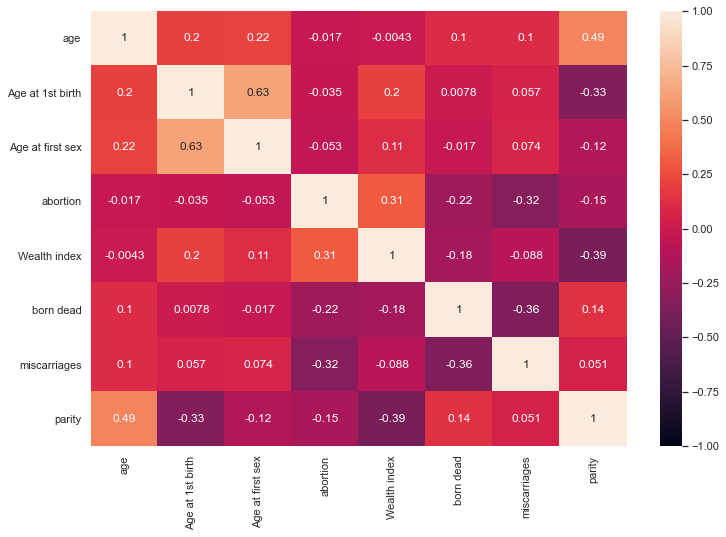

In [123]:
# Create a haetmap of the correlation table 
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,vmax=-1,vmin=1)
plt.show()

## Machine learning 

In [124]:
# print the columns of the dataset
dataset.columns

Index(['age', 'Age groups', 'Region', 'Type of place of residence',
       'Highest educational level', 'Religion', 'Literacy', 'mobile telephone',
       'bank account', 'Use of internet', 'Wealth index cat', 'parity',
       'Age at 1st birth', 'ovulatory cycle', 'living children',
       'pregnant after birth and before period', 'contraceptive method',
       'contraceptive method type', 'nb child at contraceptive first use',
       'Age at first sex', 'Owns a house', 'Owns land', 'abortion',
       'miscarriages', 'born dead', 'Wealth index'],
      dtype='object')

In [125]:
#print de statistics of the total number of children born
dataset.parity.describe()

count    1496.000000
mean        3.393048
std         2.254225
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        12.000000
Name: parity, dtype: float64

In [126]:
# Create the child_class columm where 0 means less than 3 child and 1 more than 3
dataset["child_class"]=dataset.parity.apply(lambda x : 1 if x > 3 else 0 )

In [127]:
# select the input variables that are numerical variables
X_mlset=dataset[["age","Age at 1st birth","Wealth index","abortion"]]
print(X_mlset)

       age  Age at 1st birth  Wealth index  abortion
10      44                25        -67112         1
13      38                28         -1093         0
27      22                19        154548         1
30      25                21        135569         1
33      32                23        182654         1
...    ...               ...           ...       ...
15435   25                19        -24278         1
15450   39                18        -99879         0
15460   43                17       -107715         0
15499   41                29        303973         0
15505   49                20         84614         0

[1496 rows x 4 columns]


In [128]:
# select the input variables that are categoricals variables
X_mlset2=dataset[["Region","Type of place of residence","Highest educational level","Literacy","bank account","Owns a house"]]

In [129]:
# get the dummies from the categorical dataset
X_mlset2=pd.get_dummies(X_mlset2)

In [130]:
# Merge the categoricals and numericals variables
input=pd.merge(X_mlset, X_mlset2, left_index=True, right_index=True)
# convert the input columns to arrays
input=input.values

In [131]:
# convert the output columns to arrays
output2=dataset.child_class.values

In [132]:
# Look for imbalance in the output variable
dataset.child_class.value_counts(normalize=True)

0    0.616979
1    0.383021
Name: child_class, dtype: float64

In [133]:
# Import the spliting module from skilearn
from sklearn.model_selection import train_test_split
# Split the data into train and test sample with a ratio of 8/2.
X_train, X_test, y_train, y_test = train_test_split(input, output2, test_size=0.2, random_state=9,stratify=None)

In [134]:
# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import neighbors
import sklearn.metrics as met 
import time
# create model executable
clf = neighbors.KNeighborsClassifier()
dtc=DecisionTreeClassifier()
lg=LogisticRegression()
rfc=RandomForestClassifier()
svc = LinearSVC()
# create empty list for the dataframe
time_list=[]
accuracy_scores=[]
f1_scores=[]
recall_scores=[]
precision_scores=[]
# Create a list containning all the models
models=[lg,rfc,dtc,clf,svc]
# Create a list containning the names of the corresponding models
model_names=["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","Support vector machine"]
# Create a loop that runs the following program for each model
for model in models:
    # create a variable to store the start time
    start=time.time()
    # fit the model to the train set
    model.fit(X_train,y_train)
    # create a variable to store the end time
    end=time.time()
    # store the duration of the model fitting in the time list
    time_list.append(end-start)
    # calculate the score from the test sample
    score=model.score(X_test,y_test)
    # calculate the predictions from the test sample
    y_pred=model.predict(X_test)
    # store the accuracy of the model fitting in the accuracy list
    accuracy_scores.append("{} %".format(round(score*100,2)))
    # Create a variable that stores the calculated f1 score 
    f1= met.f1_score(y_test,y_pred)
    # store the f1 score of the model fitting in the f1 score list
    f1_scores.append(f1)
    # Create a variable that stores the calculated recall score 
    recall_score= met.recall_score(y_test,y_pred)
    # store the recall score of the model fitting in the recall score list
    recall_scores.append(recall_score)
    # Create a variable that stores the calculated precision score
    precision_score= met.precision_score(y_test,y_pred)
    # store the precision score of the model fitting in the precision score list
    precision_scores.append(precision_score)
# Create the dataframe from the different list
df=pd.DataFrame(dict(Model=model_names,accuracy_score=accuracy_scores,time=time_list,F1_scores=f1_scores,recall_scores=recall_scores,precision_scores=precision_scores))
df

C:\Users\leami\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,accuracy_score,time,F1_scores,recall_scores,precision_scores
0,LogisticRegression,78.0 %,0.064015,0.720339,0.720339,0.720339
1,RandomForestClassifier,78.0 %,0.724204,0.702703,0.661017,0.750000
2,DecisionTreeClassifier,76.33 %,0.016003,0.697872,0.694915,0.700855
3,KNeighborsClassifier,62.0 %,0.016001,0.508621,0.500000,0.517544
4,Support vector machine,76.33 %,0.104019,0.635897,0.525424,0.805195


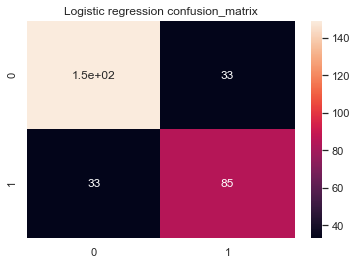

In [144]:
 # calculate the predictions from the test sample
 y_pred=lg.predict(X_test)
 # create the confusion matrix for the logistic regression model
 matrix = met.confusion_matrix(y_test,y_pred)
 # create the heatmap for this model
 sns.heatmap(matrix,annot=True)
 # Create the title for the plot
 plt.title("Logistic regression confusion_matrix")
 # print the graph
 plt.show()

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

## Summary of Data Analysis

### Demographic
* The women of our sample were mostly young, the mean age of those were 36.5 year.
* The Women age 40 to 44 were the most represented group (20.6%).
* The woman age 45-49 year were had the highest number of child born.
* The women from the west departement represented more than one third of our population (475, 31.7%).
* The women from the Grande'Anse departement had the highest mean number of child born(4.5 children).
* The women from the Grande'Anse departement had the youngest mean age at first sex(16.72 year).
* The west departement is the one with the highest wealth combined index and the lowest is Grande'Anse
* More than half of the women were from rural area(55.2%).
* The women from rural areas had a higher mean number of child born than those of urban area(3.92/2.74 child).
### Socioeconomic
* More than half of the women were able to read a whole sentence(53.8%).
* The women who could not read at all were the ones with the highest mean number of born child(4.68 child).
* The women that had a telephone were the most represented with 917 women (61.3%).
* The women that didn't have a telephone were the ones with the hightiest mean number of child(4.37/2.77).
* The women that didn't have a bank account were the most represented with 1175 women (78.5%)
* The women that didn't have a bank account were the ones with the hightiest mean number of child(3.64/2.47).
* The women that had never use internet were the most represented with 1139 women (76.1%).
* The women that had never use internet were the ones with the hightiest mean number of child(3.82).
* The women who were the richest were the most represented with 354 women (23.6%).
* The women that were the poorest were the ones with the hightiest mean number of child(4.72).
* The women who's highiest education level were secondary were the most represented with 569 women (38%)
* The women with no education at all were the one with the highest mean number of child born(5.18).
* The women who doesn't own a land were the most represented group with a count of 798 (53.3%).
* The women who only owns a land jointly were the ones with the highest mean number of child born(4.17).
* The women who doesn't own a house were the most represented group with a count of 712 (47.6%).
* The women who owns a house both alone and jointly were the ones with the highest mean number of child born(4.20).
### Reproductive
* The mean number of child of our sample was 3.39 (1-12) children. 50 % of the women had at least 3 children.
* Half of our sample had a child by the age of 21.The number of child beared by a woman and the age at 1st birth are inversely correlated.
* More than a half of the women knew that they could get pregnant after giving birth and before their periods. However that did not make a significative difference from the other women who didn't.
* The majority of the women didn't use any kind of contraception method (71%). However the use of a contraceptive method didn't influence the number of child born from a women.
* The mean age for the first sexual intercourse was 17.21 years.The age at first sex is negatively correlated to the parity.


## Questions unanswered

* There was no unanswered question related to our goals 

## Recommendations

* Center the sexual and reproductive programs in the department of grande’ Anse and centre
* Aim at women with no literacy , low to no level of education and a weak economic level
* Create awareness-raising programmes on the dangers of early pregnancy and contraception
* Provide medical support for women using contraceptive measures
